# Econometria Aplicada [Módulo em Python]
### Regressão linear múltipla - Inferência



In [ ]:
!pip install wooldridge

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import wooldridge as woo

Até agora no curso nós nos preocupamos apenas com a estimação da regressão e os aspectos mais práticos. Agora, iremos mostrar como utilizar esté método para fazer inferências estatísticas sobre as relações entre as variáveis.

Voltando ao caso de regressão simples, imagine que estejamos interessados em descobrir a relação entre horas de estudo e noma média de alunos do ensino médio. Para isso iremos simular os dados. Assim, vamos impor que a relação "populacional" é de um $\beta$ de 1. Ou seja, a cada hora estudada, a nota média aumenta em 1 ponto. Veja que não é uma relação exata, pois há um componente de erro na fórmula da nota.

In [ ]:
np.random.seed(2021)
estudo_1 = np.random.normal(loc = 4, scale = 2, size = 100)
nota_1 = estudo_1* 1 + 2.5 + np.random.normal(loc = 0, scale = 1, size = 100)
nota_1 = np.clip(nota_1,0,10)

df1 = pd.DataFrame({'estudo':estudo_1, 'nota':nota_1})

Assim, vamos estimar o parâmetro estimado da regressão entre as variáveis.

In [ ]:
reg1 = smf.ols("nota ~ estudo", data = df1)
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nota   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     318.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.48e-32
Time:                        15:41:07   Log-Likelihood:                -141.36
No. Observations:                 100   AIC:                             286.7
Df Residuals:                      98   BIC:                             291.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9733      0.233     12.743      0.000       2.510       3.436
estudo         0.8818      0.049     17.847      0.000       0.784       0.980
==============================================================================
Omnibus:                        1.422   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.492
Skew:                          -0.255   Prob(JB):                        0.474
Kurtosis:                       2.687   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perceba que o parâmetro estimado foi igual a 0.88. Agora, mudaremos a *seed* para avaliar se uma amostra diferente trará um resultado semelhante ou não da regressão

In [ ]:
np.random.seed(2022)

estudo_2 = np.random.normal(loc = 4, scale = 2, size = 100)
nota_2= estudo_2*1 + 2.5 + np.random.normal(loc = 0, scale = 1, size = 100)
nota_2= np.clip(nota_2,0,10)

df2= pd.DataFrame({'estudo':estudo_2, 'nota':nota_2})

reg2= smf.ols("nota ~ estudo", data = df2)
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nota   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     386.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           9.27e-36
Time:                        15:41:07   Log-Likelihood:                -136.89
No. Observations:                 100   AIC:                             277.8
Df Residuals:                      98   BIC:                             283.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5039      0.222     11.264      0.000       2.063       2.945
estudo         0.9885      0.050     19.646      0.000       0.889       1.088
==============================================================================
Omnibus:                        2.881   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.079
Skew:                          -0.177   Prob(JB):                        0.354
Kurtosis:                       2.388   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Agora o parâmetro estimado está em 0.98, bem mais próximo do valor real. Visualmente podemos mostrar essas duas estimações assim:

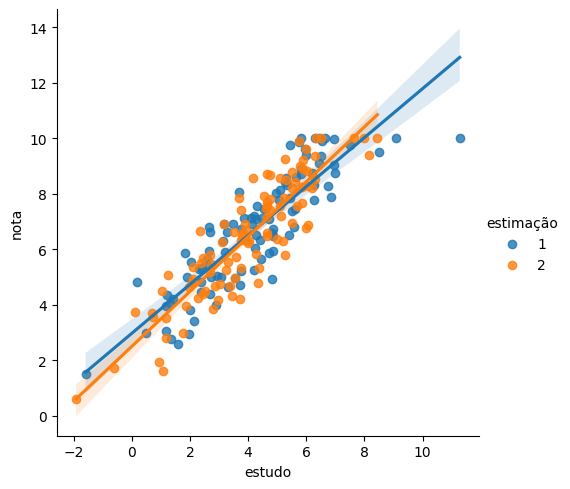

In [ ]:
df1["estimação"] = 1
df2["estimação"] = 2

df_juntos = pd.concat([df1, df2])

sns.lmplot(data=df_juntos, x="estudo", y="nota", hue="estimação")

Fica claro que dificilmente o parâmetro estimado de uma amostra seria exatamente igual ao populacional. Entretanto, as estimativas baseadas em amostras servem justamente para inferência estatística. Por exemplo, quão confiantes podemos ser sobre essa relação ser positiva, ou diferente de zero?. Outra possibilidade é que podemos criar um intervalo de confiança para os parâmetros estimados de modo a ter algum grau de certeza onde o parâmetro real se encontra.

Para isso, nós utilizamos, majoritariamente, o chamado teste T.


## Teste T

O teste T é um teste de hipótese que geralmente está interessado na seguinte hipótese nula:

\begin{equation}
H_{0}: \beta_{j}=a_{j}
\end{equation}

Em que $a_{j}$ é um número qualquer, geralmente zero. Assim, para o caso mais comum em que o teste é bilateral a hipótese alternativa é:

\begin{equation}
H_{1}: \beta_{j} \neq a_{j}
\end{equation}

Essas hipóteses são testadas utilizando o seguinte teste:

\begin{equation}
t=\frac{\hat{\beta}_{j}-a_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}
\end{equation}

Portanto, o que o teste T responde é se a diferença entre o coeficiente angular encontrado e zero (caso mais comum) foi devido ao acaso ou por realmente existir uma relação entre as variáveis que permita rejeitar a hipótese nula.

Assim, nós rejeitamos $H_{0}$ se $\left|t_{\hat{\beta}_{j}}\right|>c$, sendo $c$ o valor igual a $1-\frac{\alpha}{2}$ quantil da distribuição $t$, em que $\alpha$ é o nível de significância escolhido (em geral, 5%).

Para amostras razoávelmente grandes e $\alpha = 5\%$, o valor de $c$ irá ser próximo de dois.

Outro conceito importante é o de p-valor, que é o menor valor de nível de significância em que nós rejeitaríamos $H_{0}$ na nossa amostra. O p-valor pode ser calculado da seguinte maneira:

\begin{equation}
p_{\hat{\beta}_{j}}=2 \cdot F_{t_{n-k-1}}\left(-\left|t_{\hat{\beta}_{j}}\right|\right)
\end{equation}

Em que $F_{t_{n-k-1}}$ é a função de distribuição acumulada com $n-k-1$ graus de liberdade. Assim, nós rejeitamos $H_{0}$ se:

\begin{equation}
p_{\hat{\beta}_{j}} \leq \alpha
\end{equation}

A boa notícia é que quando estamos estimando uma regressão no Python não é preciso fazer nenhum destes cálculos manualmente, já que são parte integrando da função **summary**. Podemos demonstrar isso utilizando a regressão que estimamos ainda nesta aula.

In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nota   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     386.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           9.27e-36
Time:                        15:41:08   Log-Likelihood:                -136.89
No. Observations:                 100   AIC:                             277.8
Df Residuals:                      98   BIC:                             283.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5039      0.222     11.264      0.000       2.063       2.945
estudo         0.9885      0.050     19.646      0.000       0.889       1.088
==============================================================================
Omnibus:                        2.881   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.079
Skew:                          -0.177   Prob(JB):                        0.354
Kurtosis:                       2.388   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perceba que temos para cada coeficiente, o erro padrão, a estatística **t** e o P-valor (P>|t|). Como o P-valor é menor do que 0.05, podemos rejeitar a hipótese nula. Ou seja, podemos dizer que há uma relação diferente de zero entre as variáveis. O P-valor também está dentro dos resultados, assim podemos acessa-lo da seguinte forma:

In [ ]:
results2.pvalues

Intercept    2.241692e-19
estudo       9.272983e-36
dtype: float64

## Intervalo de confiança

Outro valor retornado pela função **summary** é o intervalo de confiança. Basicamente, o intervalo de confiança de 95% para o parâmetro $\beta_{j}$ é igual a:

\begin{equation}
\hat{\beta}_{j} \pm c \cdot \operatorname{se}\left(\hat{\beta}_{j}\right)
\end{equation}

Sendo $c$ o mesmo valor crítico apresentado no teste **t** usando um nível de significância $\alpha = 5\%$.

No caso da tabela de regressão que reportamos acima, o intervalo de confiança para o parâmetro da variável estudo está entre 0.889 e 1.088. Ou seja, o parâmetro real (1) está dentro deste intervalo.

Da mesma forma que o P-valor, podemos obter o intervalo de confiança dos parâmetros facilmente. Basta escolhermos o nível de significância desejado. Perceba que quanto menor o nível de confiança, maior o intervalo gerado.

In [ ]:
results2.conf_int(0.05)

,0,1
Intercept,2.062749,2.944989
estudo,0.888668,1.088370


In [ ]:
results2.conf_int(0.01)

,0,1
Intercept,1.919938,3.087800
estudo,0.856342,1.120696


## Teste F


Outro teste bastante utilizado é o chamado teste F. Em geral, esse teste compara os ajustes de diferentes modelos. Ao contrário dos testes t, que podem avaliar apenas um coeficiente de regressão por vez, o teste F avalia vários coeficientes simultaneamente. O teste F da significância geral é uma forma específica do teste F. Ele compara um modelo sem variáveis preditivas com o modelo que você especifica.

As hipóteses para o teste F da significância geral são as seguintes:

$H_{0}$: o ajuste do modelo somente com o intercepto e seu modelo são iguais.

$H_{1}$: o ajuste do modelo somente com o intercepto é significativamente reduzido em comparação com o seu modelo.

O teste é estimado da seguinte forma:

\begin{equation}
F=\frac{\mathrm{SSR}_{r}-\mathrm{SSR}_{u r}}{\mathrm{SSR}_{u r}} \cdot \frac{n-k-1}{q}=\frac{R_{u r}^{2}-R_{r}^{2}}{1-R_{u r}^{2}} \cdot \frac{n-k-1}{q}
\end{equation}

Em que $q$ é o número de restrições.

Novamente, a função **summary** retorna o P-valor do teste F de maneira automática. Para mostrar isso, iremos estimar uma regressão utilizando o dataset "mlb1" do pacote **Wooldridge**, que traz informações sobre 353 jogadores de Baseball.

Assim, buscaremos estimar o salário (*salary*) do jogador com base na quantidade de anos na liga (*years*), jogos por ano na liga (*gamesyr*), média de rebatidas da carreira (*bavg*) e home-runs por ano (*hrunsyr*).

In [ ]:
mlb1 = woo.dataWoo('mlb1')

mlb1.head()

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1,12,1705,6705,1076,1939,320,67,...,89.666664,70.277969,18.844229,10.877804,0.000000,0.0,70.277969,0.000000,0.0,15.660686
1,3375000.0,38407380.0,1,8,918,3333,407,863,156,38,...,50.875000,70.277969,18.844229,10.877804,18.844229,0.0,0.000000,10.877804,0.0,15.031906
2,3100000.0,38407380.0,1,5,751,2807,370,840,148,18,...,74.000000,70.277969,18.844229,10.877804,0.000000,0.0,70.277969,0.000000,0.0,14.946913
3,2900000.0,38407380.0,1,8,1056,3337,405,816,143,18,...,50.625000,70.277969,18.844229,10.877804,0.000000,0.0,70.277969,0.000000,0.0,14.880221
4,1650000.0,38407380.0,1,12,1196,3603,437,928,19,16,...,36.416668,70.277969,18.844229,10.877804,18.844229,0.0,0.000000,10.877804,0.0,14.316286


In [ ]:
reg = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr', data=mlb1)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     145.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           6.98e-73
Time:                        15:41:08   Log-Likelihood:                -386.25
No. Observations:                 353   AIC:                             782.5
Df Residuals:                     348   BIC:                             801.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0209      0.266     41.476      0.000      10.498      11.544
years          0.0677      0.012      5.592      0.000       0.044       0.092
gamesyr        0.0158      0.002     10.079      0.000       0.013       0.019
bavg           0.0014      0.001      1.331      0.184      -0.001       0.004
hrunsyr        0.0359      0.007      4.964      0.000       0.022       0.050
==============================================================================
Omnibus:                        7.369   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               11.240
Skew:                          -0.085   Prob(JB):                      0.00362
Kurtosis:                       3.858   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Com o resultado da regressão podemos inferir que, das variáveis estimadas, apenas a variável que mede a média de rebatidas da carreira (*bavg*) não obteve significância estatística a 5%. Assim, cada ano na liga aumenta em 6% o salário do jogador, o número de jogos por ano tem relação de 1.5% para cada jogo a mais na média e um home-run adicional aumenta em 4% o salário.

Como podemos ver no topo à direita. O teste F rejeita a hipótese nula, ou seja o ajuste do modelo irrestríto (com as variáveis) é estatísticamente melhor do que o restrito (apenas com o intercepto). Isso significa que podemos rejeitar que todos os parâmetros sejam iguais a zero conjuntamente.